# Script Assignment 2 - 
## Zach Novak, Marco Bogani, Ivan Lima, Daman Sawhney and Sulaiman Karmali. 


In [13]:
# Import the relevant libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import StandardScaler
import matplotlib.pyplot as plt

### 1. Pre-processing

In [14]:
# Read CSV into a DataFrame
df = pd.read_csv(r'C:\Users\Setup User\University of Central Florida\CAP5619_GRP - General\Script Assigments\Script_Assign_2\LoanData.csv')

# Selecting the relevant columns
df = df.loc[:, ['income', 'age', 'Credit_Score', 'dtir1', 'loan_amount','Status']]

# df preview
print("\nDataFrame head preview...\n",df.head())

# data types before processing
print("\nData types before processing...\n",df.dtypes)

# before data type can be converted to int, we need to fill in the missing values
df['income'] = df['income'].fillna(0).astype(int)
df['Credit_Score'] = df['Credit_Score'].fillna(0).astype(int)
df['dtir1'] = df['dtir1'].fillna(0).astype(int)
df['loan_amount'] = df['loan_amount'].fillna(0).astype(int)
df['Status'] = df['Status'].fillna(0).astype(int)
df['age'] = df['age'].fillna(0).astype(str)

# Function to reformat age column
def process_age_range(value):
    if '-' in value:
        age_range = value.split('-')
        return age_range[1]
    elif value.startswith('>'):
        return value[1:]
    elif value.startswith('<'):
        return value[1:]
    else:
        return value
df['age'] = df['age'].apply(process_age_range)

# Set age to int data type
df['age'] = df['age'].fillna(0).astype(int)



df_with_nan = df.copy()



DataFrame head preview...
     income    age  Credit_Score  dtir1  loan_amount  Status
0   1740.0  25-34           758   45.0       116500       1
1   4980.0  55-64           552    NaN       206500       1
2   9480.0  35-44           834   46.0       406500       0
3  11880.0  45-54           587   42.0       456500       0
4  10440.0  25-34           602   39.0       696500       0

Data types before processing...
 income          float64
age              object
Credit_Score      int64
dtir1           float64
loan_amount       int64
Status            int64
dtype: object


* Above, it can be observed that the columns chosen for this study are different data types (float64, object, int64). Code is implemented to convert all columns to an integer type as required by the Gradient Descent. For the age column, first the Process_age_function is defined to remove the value range format as seen in the DataFrame head preview per the above cell's output.

In [15]:
# DataFrame after preprocessing

print("\nData types post processing...\n",df.dtypes)
print("\nDataFrame head preview...\n",df.head(3))
print("\nDataFrame tail preview...\n",df.tail(3))
print("\nDataFrame description...\n",df.describe().round(2))





Data types post processing...
 income          int32
age             int32
Credit_Score    int32
dtir1           int32
loan_amount     int32
Status          int32
dtype: object

DataFrame head preview...
    income  age  Credit_Score  dtir1  loan_amount  Status
0    1740   34           758     45       116500       1
1    4980   64           552      0       206500       1
2    9480   44           834     46       406500       0

DataFrame tail preview...
         income  age  Credit_Score  dtir1  loan_amount  Status
148667    6900   54           702     49       446500       0
148668    7140   64           737     29       196500       0
148669    7260   54           830     44       406500       0

DataFrame description...
           income        age  Credit_Score      dtir1  loan_amount     Status
count  148670.00  148670.00     148670.00  148670.00    148670.00  148670.00
mean     6529.14      54.83        699.79      31.61    331117.74       0.25
std      6511.82      13.47     

* The outcome of the preprocessing can be viewed in the above cell's output. All columns are now an integer data type, the DataFrame head preview shows the data is formatted, and the DataFrame description is able to now give meaningful analysis for the dataset. However, there is one item of concern. The min values for income and age are 0 which signifies incomplete data for those rows in the DataFrame. 

In [16]:
# set columns to replace 0 values to NaN, then have the NaN values removed

df['age'] = df['age'].replace(0, np.nan)
df['income'] = df['income'].replace(0, np.nan)

# remove NaN values from the DataFrame
df = df.dropna()

# DataFrame statistics after removing NaN values
print("\nDataFrame description...\n",df.describe().round(2))


print("\n\nDataFrame WITH NaN values row count...\n", len(df_with_nan))
print("\nDataFrame WITHOUT NaN values row count...\n", len(df))


DataFrame description...
           income        age  Credit_Score      dtir1  loan_amount     Status
count  138260.00  138260.00     138260.00  138260.00    138260.00  138260.00
mean     7020.74      54.95        699.88      33.93    328767.97       0.25
std      6491.93      13.31        115.84      15.16    184463.22       0.43
min        60.00      25.00        500.00       0.00     16500.00       0.00
25%      3780.00      44.00        600.00      28.00    196500.00       0.00
50%      5760.00      54.00        700.00      37.00    296500.00       0.00
75%      8580.00      64.00        800.00      44.00    436500.00       0.00
max    578580.00      74.00        900.00      61.00   3576500.00       1.00


DataFrame WITH NaN values row count...
 148670

DataFrame WITHOUT NaN values row count...
 138260


* With the 0 values removed, the dataset description shows a more meaningful statistical overview. 
* It can be confirmed by the before and after DataFrame len() change. 10,410 rows contained 0 or NaN which were dropped from the DataFrame.

### 2. Splitting training and test data

In [17]:

# Prepare the dataset for training
X = df[['income', 'age', 'Credit_Score', 'dtir1', 'loan_amount']].values
y = df['Status'].values  # Assuming the target variable column is 'Status'

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3. Scaling and cost computation

In [18]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [20]:

# Compute cost
def compute_cost(X, y, weights, bias):
    m = len(y)
    y_pred = sigmoid(np.dot(X, weights) + bias)
    return -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

### 4. Implement Gradient Descent function

In [21]:

# Gradient descent function supporting Batch, SGD, and Mini-batch
def gradient_descent(X, y, weights, bias, learning_rate, iterations, batch_size=None):
    m, n = X.shape
    cost_history = []

    for i in range(iterations):
        if batch_size is None or batch_size >= m:
            X_batch, y_batch = X, y
        elif batch_size == 1:
            idx = np.random.randint(0, m)
            X_batch, y_batch = X[idx:idx + 1], y[idx:idx + 1]
        else:
            idx = np.random.choice(m, batch_size, replace=False)
            X_batch, y_batch = X[idx], y[idx]

        y_pred = sigmoid(np.dot(X_batch, weights) + bias)
        dw = (1 / m) * np.dot(X_batch.T, (y_pred - y_batch))
        db = (1 / m) * np.sum(y_pred - y_batch)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            cost = compute_cost(X, y, weights, bias)
            cost_history.append(cost)
            print(f"Iteration {i}: Cost {cost}")

    return weights, bias, cost_history


# Initialize parameters
weights = np.zeros(X_train.shape[1])
bias = 0
iterations = 1000
learning_rate = 0.01

# "None" for batch GD, "1" for SGD, >1 for Mini-batch GD
batch_size = None



* With the infrastructure setup, we can diverge into training/testing/evaluating with and without scaling.

### 5. Without scaling...

In [22]:
# Train without scaling
print("Training without scaling...")
weights_noscale, bias_noscale, cost_history_noscale = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.01, 1000, batch_size)


# Prediction function
def predict(X, weights, bias):
    return (sigmoid(np.dot(X, weights) + bias) > 0.5).astype(int)

y_pred_test_noscale = predict(X_test, weights_noscale, bias_noscale)

# evaluate the unscaled model
print("\nEvaluating the unscaled model...")
accuracy = accuracy_score(y_test, y_pred_test_noscale)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred_test_noscale)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred_test_noscale)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred_test_noscale)
print(f"F1 Score: {f1}")


Training without scaling...
Iteration 0: Cost nan


C:\Users\Setup User\AppData\Local\Temp\ipykernel_28192\3630237461.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Setup User\AppData\Local\Temp\ipykernel_28192\4043861937.py:5: RuntimeWarning: divide by zero encountered in log
  return -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
C:\Users\Setup User\AppData\Local\Temp\ipykernel_28192\4043861937.py:5: RuntimeWarning: invalid value encountered in multiply
  return -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


Iteration 100: Cost nan
Iteration 200: Cost nan
Iteration 300: Cost nan
Iteration 400: Cost nan
Iteration 500: Cost nan
Iteration 600: Cost nan
Iteration 700: Cost nan
Iteration 800: Cost nan
Iteration 900: Cost nan

Evaluating the unscaled model...
Accuracy: 0.7509764212353537
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* Above, it is observed that the error 'overflow encountered...' demonstrates the exponential computations without scaling will be beyond the model's capabilities.
* Although accuracy did generate a result, the model can be determined as flawed since the other metrics (precision, recall and F1 Score) are 0.
### 6. With Scaling...

In [23]:

# Training the model (Choose one set of data: scaled or unscaled)
print("Training with scaled features...")
weights_scaled, bias_scaled, cost_history_scaled = gradient_descent(X_train_scaled, y_train, weights, bias,
                                                                    learning_rate, iterations, batch_size=batch_size)

# Prediction function
y_pred_test_scaled = predict(X_test_scaled, weights_scaled, bias_scaled)

# Evaluate the scaled model
print("\nEvaluating the unscaled model...")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_test_scaled)}")
print(f"Precision: {precision_score(y_test, y_pred_test_scaled)}")
print(f"Recall: {recall_score(y_test, y_pred_test_scaled)}")
print(f"F1 Score: {f1_score(y_test, y_pred_test_scaled)}")

Training with scaled features...
Iteration 0: Cost 0.6922087958702784
Iteration 100: Cost 0.6183462481523766
Iteration 200: Cost 0.5726902784144299
Iteration 300: Cost 0.5436398088546579
Iteration 400: Cost 0.5245503105721675
Iteration 500: Cost 0.5116204028782889
Iteration 600: Cost 0.50262316948259
Iteration 700: Cost 0.4962126941996526
Iteration 800: Cost 0.49154939048178875
Iteration 900: Cost 0.4880939043168637

Evaluating the unscaled model...

Accuracy: 0.8511861709822074
Precision: 0.9105185185185185
Recall: 0.44626778971826897
F1 Score: 0.5989669622843777


* Above, the cost iterations are clearly being calculated during the run.
* The performance metrics are demonstrating a succesful prediction. Farther along, this notebook will show the difference in performance when the 0/NaN values are NOT dropped.

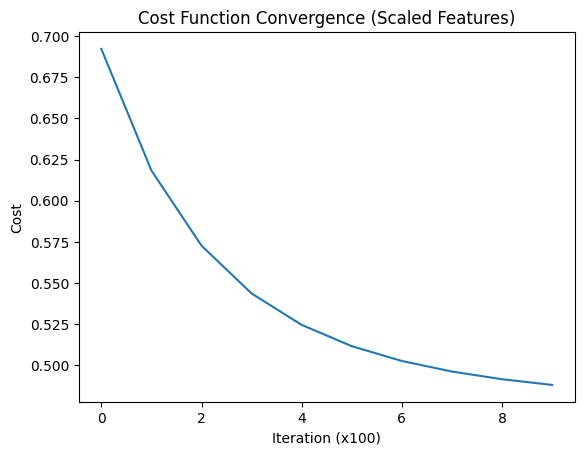

In [25]:
# Visualizing the cost function convergence (scaled)
plt.plot(cost_history_scaled)
plt.xlabel('Iteration (x100)')
plt.ylabel('Cost')
plt.title('Cost Function Convergence (Scaled Features)')
plt.show()

* The graphical visualization depicts the iteractions x-axis (number of iterations the algorithm has performed) while the y-axis, Cost, represents the value of error/loss the model absorbs in its prediction.
* The steep decline which turns gradual as y approaches infinity, demostrates the optimization algorithm did its job during training. As iterations increased, cost decreased.

## Write- Up: Application of Gradient Descent Optimized Credit Scoring Models in Fintech 
   - Provide a brief explanation of how the credit scoring model optimized using gradient descent can be applied in the fintech industry.
   - Discuss the potential benefits and challenges of using machine learning models for credit scoring in fintech.

   ----------------------------------------------------------------------------------------

The use of gradient descent can be used in credit scoring models among many other different areas in fintech by predicting credit worthiness of possible customers. It can help with financial management risks and the discovery of profitable customers. 

By using historical data and by optimizing the parameters in using gradient descent, credit providers can quickly predict behaviors and trends. 

Here are some of the possibilities: 

1. Fraud detection – This would help with finding fraudulent activities as well as preventing them with huge impact on minimizing financial loss. 

1. Dynamic risk assessment – This would help with finding credit worthiness in near real time. 

1. Automated decision making – This would help with eliminating the need of a person to approve someone’s credit and cutting time during the process. An example would be how credit cards are easily approved from websites almost instantly. 

1. Personalized financial products – This helps with identifying products for customers even when they are not looking for one. It can also improve current products already being used by customers. 

There are several benefits related to the examples given above, some of the main ones would be. 

1. Financial accessibility for all who are truly worthy of the service - These algorithms can approve individuals that in different times would not be approved. The most important thing is that it would be with minimal risk. 

2. Efficiency – There would be a great increase in efficiency which in turn could bring even more customers. 

2. Accuracy – Similar to accessibility, taking out of human hands and leaving for the algorithms will diminish the error possibility. 

2. Customer experience – No more calls or waiting to be answered, how good can that be for the customers?  

All these can be such a great divisor in the financial system that if one company ignores these benefits, they could fall way behind in the competition. 

There are also some challenges.  

1. Bias – The machine learning process depends on historical data. Depending on the source of the data, the prediction could be misleading. So, a recognized and reputable source of data is important. 

1. Transparency and Technical understanding – These math models and algorithms can be challenging for managers and sometime even for customers. It makes it hard to explain business decisions. 

1. Compliance – With evolving regulations and standards mixed with technical understanding, can be quite difficult to keep up with local laws and regulations and even worse with laws and regulations from non-local locations. 

1. Data privacy and security – Since data is needed, it must be determined what should be used or not. Who would determine that? 

In conclusion, while gradient descent optimized credit scoring models offer significant potential to revolutionize the fintech industry by making credit assessment processes more efficient, accurate, and inclusive, careful attention must be paid to the challenges of data privacy, model bias, transparency, and regulatory compliance to ensure these technologies benefit both the companies and their customers responsibly.   